All specified features are present in the dataset.

Correlations with Heart Disease Status:
Age                    -0.010633
Gender                 -0.016726
Blood Pressure         -0.013552
Cholesterol Level       0.003711
Exercise Habits         0.002593
Smoking                 0.002693
Family Heart Disease   -0.007592
Diabetes               -0.001607
BMI                     0.018840
High Blood Pressure     0.002826
Low HDL Cholesterol    -0.005176
High LDL Cholesterol    0.008839
Stress Level            0.011500
Sleep Hours            -0.004297
Sugar Consumption       0.006689
Triglyceride Level      0.004931
Fasting Blood Sugar    -0.002914
CRP Level              -0.005690
Homocysteine Level      0.007423
Lifestyle_Risk          0.007115
Name: Heart Disease Status, dtype: float64
Absolute correlations > 0.1: 0 features


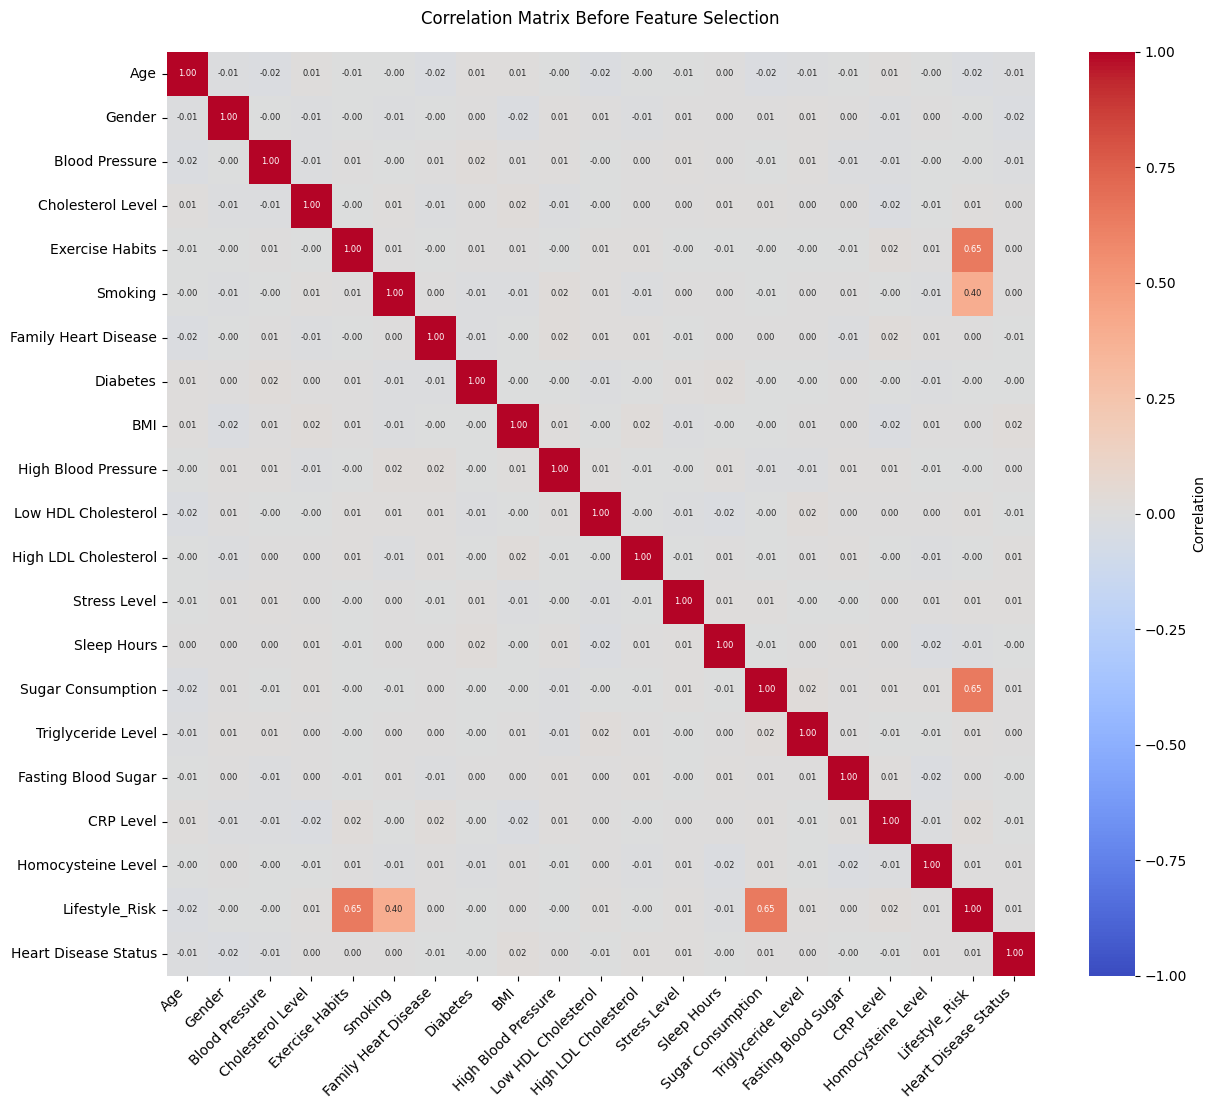


Selected features based on correlation with Heart Disease Status: []

Number of features before selection: 20
Number of features after selection: 0


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Scaled_dataset.csv')

df.head()

# Explicitly define all features (excluding the target variable)
all_features = [
    'Age', 'Gender', 'Blood Pressure', 'Cholesterol Level', 'Exercise Habits',
    'Smoking', 'Family Heart Disease', 'Diabetes', 'BMI', 'High Blood Pressure',
    'Low HDL Cholesterol', 'High LDL Cholesterol', 'Stress Level', 'Sleep Hours',
    'Sugar Consumption', 'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level',
    'Homocysteine Level', 'Lifestyle_Risk'
]

# Verify that all features exist in the dataset
missing_features = [f for f in all_features if f not in df.columns]
if missing_features:
    print(f"Warning: The following features are not in the dataset: {missing_features}")
else:
    print("All specified features are present in the dataset.")


# Compute correlation matrix (including target)
correlation_matrix = df[all_features + ['Heart Disease Status']].corr()

# Diagnostic: Print correlations with Heart Disease Status
print("\nCorrelations with Heart Disease Status:")
print(target_correlation := correlation_matrix['Heart Disease Status'].drop('Heart Disease Status'))
print(f"Absolute correlations > 0.1: {(abs(target_correlation) > 0.1).sum()} features")

# --- Before Feature Selection: Correlation Heatmap ---
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, 
            annot_kws={'size': 6}, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix Before Feature Selection', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.savefig('Graphs/Correlation Matrix Before Feature Selection.png')
plt.show()
plt.close()

# Feature selection based on correlation with Heart Disease Status (> |0.1|)
selected_features = target_correlation[abs(target_correlation) > 0.1].index.tolist()
print("\nSelected features based on correlation with Heart Disease Status:", selected_features)

# Proceed only if features were selected
if selected_features:
    # Check for multicollinearity (correlation > 0.7 among predictors)
    predictor_correlation = correlation_matrix.loc[selected_features, selected_features]
    high_corr_pairs = np.where(np.triu((predictor_correlation.abs() > 0.7) & (predictor_correlation != 1)))
    for i, j in zip(high_corr_pairs[0], high_corr_pairs[1]):
        if i < j:
            print(f"High correlation between {predictor_correlation.index[i]} and {predictor_correlation.index[j]}: {predictor_correlation.iloc[i, j]:.2f}")
# Print number of features before and after selection
print(f"\nNumber of features before selection: {len(all_features)}")
print(f"Number of features after selection: {len(selected_features)}")

In [4]:
# Drop Lifestyle_Risk feature
df= df.drop('Lifestyle_Risk', axis=1)
print("Dropped 'Lifestyle_Risk' feature from the dataset.")
df.head()

Dropped 'Lifestyle_Risk' feature from the dataset.


,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,0.612903,1.0,0.550000,0.026882,1.0,1.0,1.0,0.0,0.317756,1.0,1.0,0.0,0.5,0.605503,0.5,0.611111,0.330579,0.864751,0.492507,0
1,0.822581,0.0,0.433333,0.731183,1.0,0.0,1.0,1.0,0.328222,0.0,1.0,0.0,1.0,0.790657,0.5,0.083333,0.636364,0.623722,0.953319,0
2,0.451613,1.0,0.100000,0.354839,0.0,0.0,0.0,0.0,0.538899,0.0,1.0,1.0,0.0,0.073314,0.0,0.739899,0.099174,0.847452,0.415412,0
3,0.225806,0.0,0.033333,0.768817,1.0,1.0,1.0,0.0,0.278604,1.0,0.0,1.0,1.0,0.208156,1.0,0.487374,0.115702,0.834058,0.064120,0
4,0.677419,1.0,0.766667,0.494624,0.0,1.0,1.0,1.0,0.112914,1.0,0.0,0.0,1.0,0.505116,1.0,0.411616,0.611570,0.692144,0.210260,0


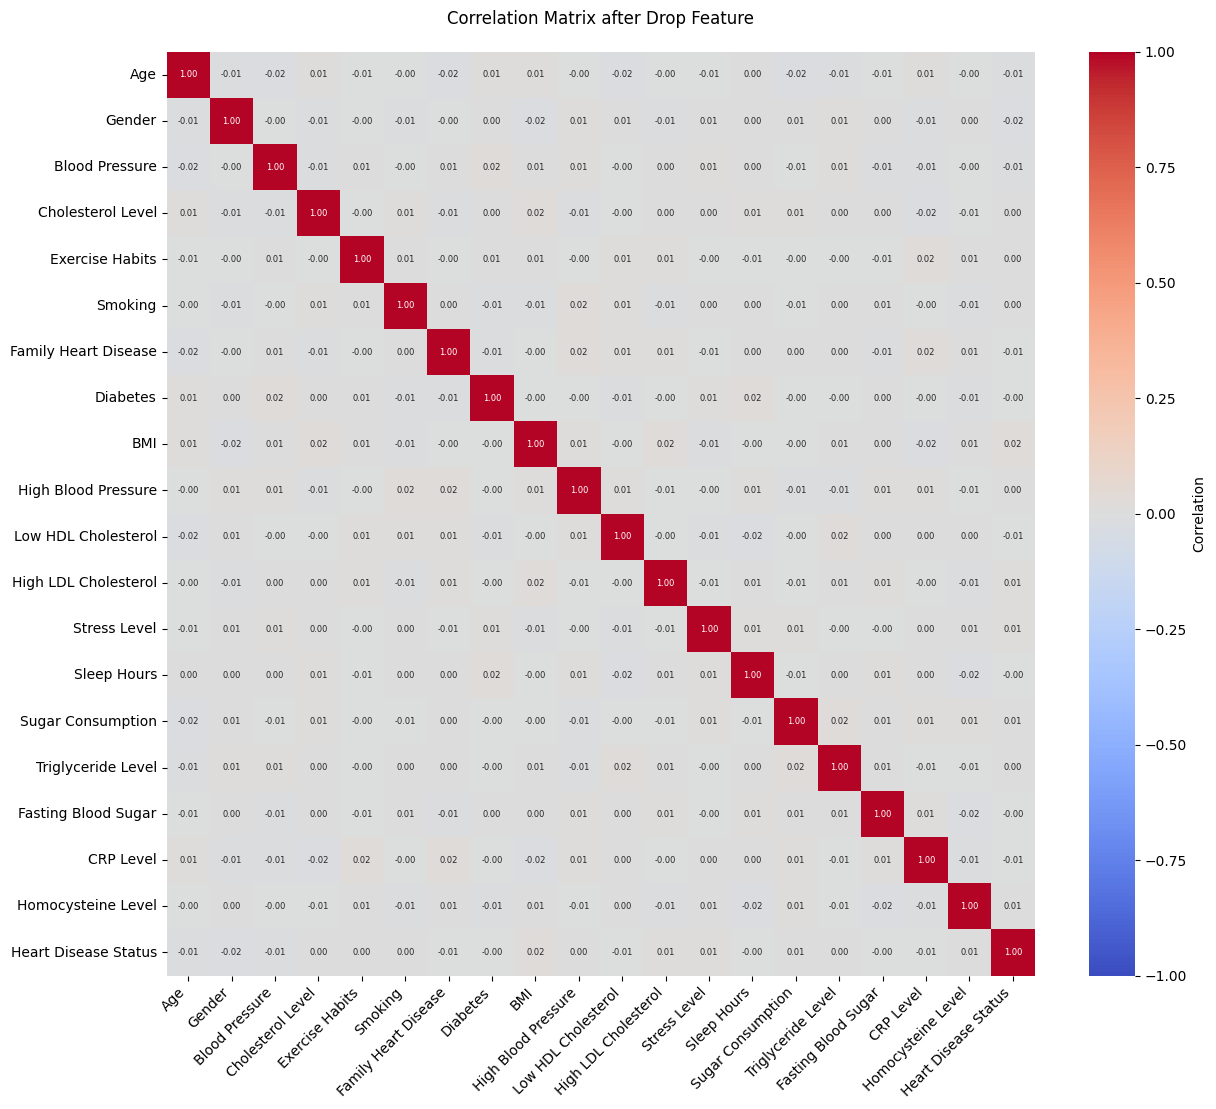

In [5]:

# all features (excluding target)
all_features = [col for col in df.columns if col != 'Heart Disease Status']

# Compute correlation matrix (including target)
correlation_matrix = df[all_features + ['Heart Disease Status']].corr()

# Step 3: after Feature Selection - Correlation Heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, 
            annot_kws={'size': 6}, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix after Drop Feature', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.savefig('Graphs/Correlation Matrix After Drop Feature.png')
plt.show()
plt.close()